# **modelling & optimasi parameter**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from deap import base, creator, tools
import random
import time

In [2]:
df = pd.read_csv('../data/data_preprocessed.csv')
df

,content,cleaned,normalized,stopwords_removed,stemmed,tokens,sentiment,label
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat,sangat mudah manfaat,"['sangat', 'mudah', 'manfaat']",positive,1
1,Mantap,mantap,mantap,mantap,mantap,['mantap'],positive,1
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih,kok aku download sih,"['kok', 'aku', 'download', 'sih']",negative,-1
3,ok,ok,ok,NaN,NaN,[],neutral,0
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...,mantap bagus aplikasi bintang tiga dulu lah ub...,"['mantap', 'bagus', 'aplikasi', 'bintang', 'ti...",negative,-1
...,...,...,...,...,...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...,oke kalau jam jam sore susah gojek lama nunggu...,oke kalau jam jam sore susah gojek lama nunggu...,"['oke', 'kalau', 'jam', 'jam', 'sore', 'susah'...",negative,-1
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game,seru seru lah orang bukan game,seru seru lah orang bukan game,"['seru', 'seru', 'lah', 'orang', 'bukan', 'game']",positive,1
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...,penguna gojek tahun selalu ganti akun sering k...,penguna gojek tahun selalu ganti akun sering k...,"['penguna', 'gojek', 'tahun', 'selalu', 'ganti...",negative,-1
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis pilih sendiri...,diskon selalu pasang otomatis pilih sendiri pa...,"['diskon', 'selalu', 'pasang', 'otomatis', 'pi...",positive,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   content            15002 non-null  object
 1   cleaned            14858 non-null  object
 2   normalized         14858 non-null  object
 3   stopwords_removed  14423 non-null  object
 4   stemmed            14423 non-null  object
 5   tokens             15002 non-null  object
 6   sentiment          15002 non-null  object
 7   label              15002 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 937.8+ KB


In [4]:
df.isna().sum()

content                0
cleaned              144
normalized           144
stopwords_removed    579
stemmed              579
tokens                 0
sentiment              0
label                  0
dtype: int64

In [5]:
df = df.fillna('')
df

,content,cleaned,normalized,stopwords_removed,stemmed,tokens,sentiment,label
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat,sangat mudah manfaat,"['sangat', 'mudah', 'manfaat']",positive,1
1,Mantap,mantap,mantap,mantap,mantap,['mantap'],positive,1
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih,kok aku download sih,"['kok', 'aku', 'download', 'sih']",negative,-1
3,ok,ok,ok,,,[],neutral,0
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...,mantap bagus aplikasi bintang tiga dulu lah ub...,"['mantap', 'bagus', 'aplikasi', 'bintang', 'ti...",negative,-1
...,...,...,...,...,...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...,oke kalau jam jam sore susah gojek lama nunggu...,oke kalau jam jam sore susah gojek lama nunggu...,"['oke', 'kalau', 'jam', 'jam', 'sore', 'susah'...",negative,-1
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game,seru seru lah orang bukan game,seru seru lah orang bukan game,"['seru', 'seru', 'lah', 'orang', 'bukan', 'game']",positive,1
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...,penguna gojek tahun selalu ganti akun sering k...,penguna gojek tahun selalu ganti akun sering k...,"['penguna', 'gojek', 'tahun', 'selalu', 'ganti...",negative,-1
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis pilih sendiri...,diskon selalu pasang otomatis pilih sendiri pa...,"['diskon', 'selalu', 'pasang', 'otomatis', 'pi...",positive,1


## **train test split**

In [6]:
X = df['tokens']
y = df['label']

melakukan pemisahan data menjadi data latih dan data uji dengan perbandingan 80% untuk data latih dan 20% untuk data uji

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Extraction**

Melakukan ekstraksi fitur dari data teks menggunakan CountVectorizer dan TfidfTransformer untuk menghasilkan representasi vektor TF-IDF pada data latih dan data uji.

In [8]:
vectorizer = CountVectorizer()
tfidf = TfidfTransformer()

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

X_train_tfidf = tfidf.fit_transform(X_train_counts)
X_test_tfidf = tfidf.transform(X_test_counts)

## **modelling**

In [9]:
svc = SVC(class_weight='balanced')
svc.fit(X_train_tfidf, y_train)

SVC(class_weight='balanced')

### **Evaluation**

In [10]:
y_pred = svc.predict(X_test_tfidf)

In [11]:
print(confusion_matrix(y_test, y_pred, labels=[-1, 0, 1]))

[[1505   39   43]
 [  63  340   31]
 [  81   37  862]]


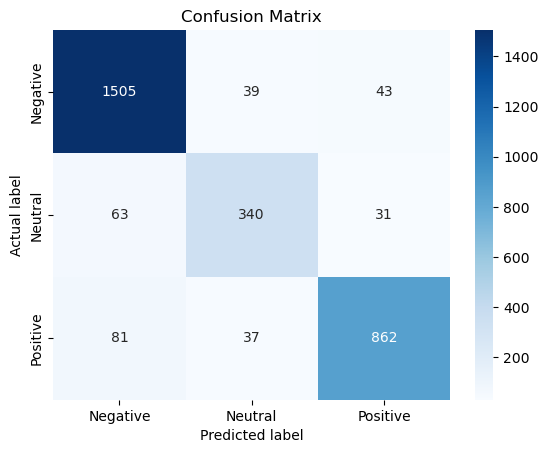

In [12]:
conf_mat = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

- Untuk kelas "Negative," model berhasil memprediksi 1505 dari total sampel aktual sebagai negatif, dengan kesalahan 39 (diprediksi netral) dan 43 (diprediksi positif). 
- Kelas "Neutral" memiliki 340 prediksi benar, dengan 63 salah diprediksi sebagai negatif dan 31 sebagai positif. 
- Kelas "Positive" menunjukkan performa terbaik dengan 862 prediksi benar, dan kesalahan 81 (diprediksi negatif) serta 37 (diprediksi netral). 
- Secara keseluruhan, model menunjukkan ketepatan tinggi pada kelas "Positive" dan "Negative," tetapi cenderung kurang akurat untuk "Neutral," yang memiliki lebih banyak kesalahan prediksi, terutama ke arah "Negative." Ini menunjukkan bahwa model mungkin kesulitan membedakan sentimen netral dari negatif dalam data ulasan Gojek.

In [59]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred, average='weighted')
precision = metrics.precision_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

accuracy_percent = '{:.2%}'.format(accuracy)
recall_percent = '{:.2%}'.format(recall)
precision_percent = '{:.2%}'.format(precision)
f1_percent = '{:.2%}'.format(f1)

print('Accuracy:', accuracy_percent)
print('Recall:', recall_percent)
print('Precision:', precision_percent)
print('F1_Score:', f1_percent)

Accuracy: 90.20%
Recall: 90.20%
Precision: 90.16%
F1_Score: 90.14%


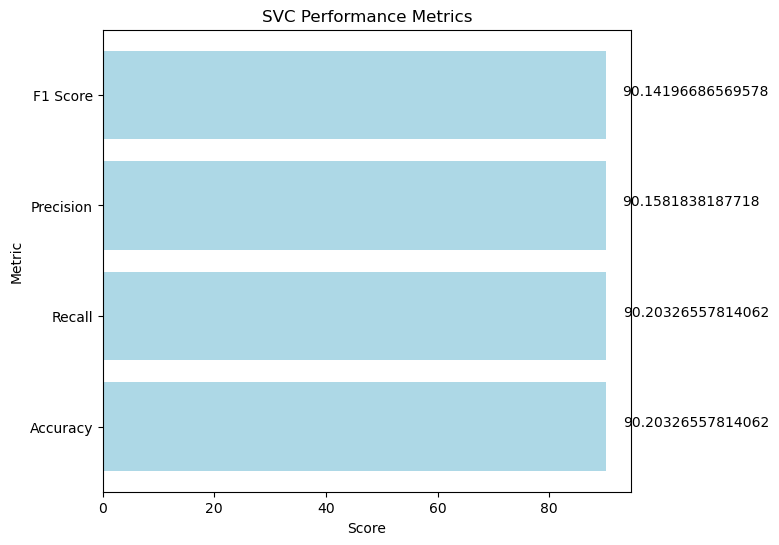

In [34]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
scores = [accuracy*100, recall*100, precision*100, f1*100]


plt.figure(figsize=(15, 6))
y_pos = np.arange(len(metrics))
plt.subplot(1,2,1)
plt.barh(y_pos, scores, align='center', color='lightblue')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('SVC Performance Metrics')
plt.yticks(y_pos, metrics)
for i, v in enumerate(scores):
    plt.text(v + 3, i, str(v), va='baseline')
    
plt.show()
plt.show()

- Accuracy: Skor 90.20326557814062% menunjukkan bahwa model benar memprediksi sekitar 90,2% dari total data ulasan, mencerminkan kemampuan model untuk mengklasifikasikan sentimen secara keseluruhan dengan baik.
- Recall: Dengan skor 90.20326557814062%, model berhasil mengidentifikasi 90,2% dari semua instance positif, negatif, dan netral secara akurat, menunjukkan sensitivitas yang tinggi terhadap semua kelas.
- Precision: Skor 90.158138187718% menunjukkan bahwa 90,16% dari prediksi positif model benar-benar positif, mengindikasikan tingkat keakuratan prediksi yang tinggi dengan sedikit false positives.
- F1 Score: Skor 90.1419668659578% adalah rata-rata harmonik antara precision dan recall, menunjukkan keseimbangan yang baik antara kedua metrik tersebut, dengan nilai sekitar 90,14%.


Hasil evaluasi ini menunjukkan bahwa model SVC memiliki performa yang sangat konsisten dan unggul, dengan semua metrik berada di kisaran 90%, yang mengindikasikan kemampuan model untuk mengklasifikasikan sentimen (negatif, netral, positif) dengan tingkat keberhasilan yang tinggi. Konsistensi skor di antara metrik menunjukkan bahwa model tidak hanya akurat secara keseluruhan (accuracy), tetapi juga efektif dalam mengenali kelas yang relevan (recall) dan meminimalkan kesalahan prediksi (precision). F1 Score yang tinggi mengonfirmasi bahwa model mampu menyeimbangkan precision dan recall, yang penting untuk dataset yang mungkin memiliki ketidakseimbangan kelas, seperti yang terlihat dari matriks kebingungan sebelumnya.

## **Hyperparameter tuning**

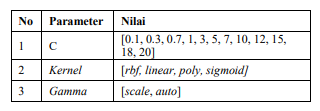

Melakukan inisialisasi dan konfigurasi parameter yang akan digunakan dalam proses pencarian hyperparameter SVC menggunakan algoritma genetika, yaitu daftar nilai C, kernel, dan gamma yang akan dieksplorasi berdasarkan jurnal:

Fajri, M., & Primajaya, A. (2023). Komparasi teknik hyperparameter optimization pada SVM untuk permasalahan klasifikasi dengan menggunakan Grid Search dan Random Search. *Journal of Applied Informatics and Computing (JAIC)*, 7(1), 10–15. https://doi.org/10.30871/jaic.v7i1.4585

In [62]:
C_values = [0.1, 0.3, 0.7, 1, 3, 5, 7, 10, 12, 15, 18, 20]
kernel_values = ['rbf', 'linear', 'poly', 'sigmoid']
gamma_values = ['scale', 'auto']

Melakukan inisialisasi dan konfigurasi algoritma genetika untuk optimasi hyperparameter SVC, termasuk pembuatan struktur individu, populasi, serta fungsi evaluasi (fitness) yang menggunakan cross-validation untuk menilai performa kombinasi parameter C, kernel, dan gamma. Selain itu, didaftarkan juga operator genetika seperti crossover, mutasi, dan seleksi yang akan digunakan dalam proses evolusi populasi untuk menemukan kombinasi parameter terbaik.

In [23]:
# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Definisikan gen
toolbox = base.Toolbox()
toolbox.register("attr_C", random.choice, C_values)
toolbox.register("attr_kernel", random.choice, kernel_values)
toolbox.register("attr_gamma", random.choice, gamma_values)

# Struktur individu: [C, kernel, gamma]
toolbox.register("individual", tools.initCycle, creator.Individual,
                (toolbox.attr_C, toolbox.attr_kernel, toolbox.attr_gamma), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fungsi evaluasi (fitness)
def evaluate(individual):
    C, kernel, gamma = individual
    svc = SVC(C=C, kernel=kernel, gamma=gamma, class_weight='balanced')
    scores = cross_val_score(svc, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    return scores.mean(),

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(C_values)-1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

menjalankan proses optimasi hyperparameter pada model Support Vector Classifier (SVC) menggunakan genetic algorithm: 
- Proses dimulai dengan inisialisasi populasi individu, di mana setiap individu merepresentasikan kombinasi nilai hyperparameter SVC (C, kernel, dan gamma). 
- Selama sejumlah generasi yang telah ditentukan, populasi mengalami seleksi, crossover, dan mutasi untuk menghasilkan kombinasi hyperparameter baru yang lebih baik. 
- Setiap individu dievaluasi menggunakan cross-validation untuk mengukur akurasi model dengan kombinasi parameter tersebut. 
- Setelah seluruh generasi selesai, waktu eksekusi dicatat dan populasi akhir berisi individu-individu dengan performa terbaik berdasarkan skor validasi. 

In [27]:
pop = toolbox.population(n=50)
ngen = 20
cxpb = 0.5
mutpb = 0.2

start_time = time.time()

for gen in range(ngen):
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < cxpb:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < mutpb:
            if random.random() < 0.5:
                mutant[0] = random.choice(C_values)
            if random.random() < 0.5:
                mutant[1] = random.choice(kernel_values)
            if random.random() < 0.5:
                mutant[2] = random.choice(gamma_values)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring
    
end_time = time.time()
elapsed_time = end_time - start_time
elapsed_minutes = elapsed_time / 60
print(f"Waktu eksekusi Genetic Algorithm: {elapsed_minutes:.2f} menit")

Waktu eksekusi Genetic Algorithm: 369.88 menit


In [28]:
best_individual = tools.selBest(pop, k=1)[0]
best_C, best_kernel, best_gamma = best_individual
print(f"Parameter terbaik: C={best_C}, kernel={best_kernel}, gamma={best_gamma}")
print(f"Skor validasi terbaik: {best_individual.fitness.values[0]}")

Parameter terbaik: C=7, kernel=rbf, gamma=scale
Skor validasi terbaik: 0.9055076704151048


Proses optimasi parameter untuk model Support Vector Classifier (SVC) menggunakan Genetic Algorithm telah selesai dengan waktu eksekusi sebesar 369,88 menit, yang mencerminkan kompleksitas pencarian kombinasi parameter terbaik dari rentang nilai yang ditentukan. Rentang parameter yang diuji meliputi nilai C ([0.1, 0.3, 0.7, 1, 3, 5, 7, 10, 12, 15, 18, 20]), kernel ([rbf, linear, poly, sigmoid]), dan gamma ([scale, auto]). Hasil optimasi menunjukkan bahwa parameter terbaik adalah C=7, kernel=rbf, dan gamma=scale, yang menghasilkan skor validasi tertinggi sebesar 0.9055076704151048 (sekitar 90,55%). Kombinasi ini menunjukkan bahwa kernel radial basis function (rbf) dengan pengaturan gamma secara otomatis (scale) dan nilai regularisasi C=7 memberikan kinerja optimal untuk dataset ulasan Gojek, dengan waktu eksekusi yang cukup panjang menandakan evaluasi menyeluruh terhadap berbagai konfigurasi untuk memastikan keandalan model.

In [29]:
best_svc = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, class_weight='balanced')
best_svc.fit(X_train_tfidf, y_train)

SVC(C=7, class_weight='balanced')

In [61]:
import joblib

joblib.dump(svc, '../models/svc.joblib')

joblib.dump(best_svc, '../models/svc_tuned.joblib')

['../models/svc_tuned.joblib']

### **Evaluation**

In [30]:
y_pred_ga = best_svc.predict(X_test_tfidf)

In [31]:
print(confusion_matrix(y_test, y_pred_ga, labels=[-1, 0, 1]))

[[1539   24   24]
 [  81  329   24]
 [  84   28  868]]


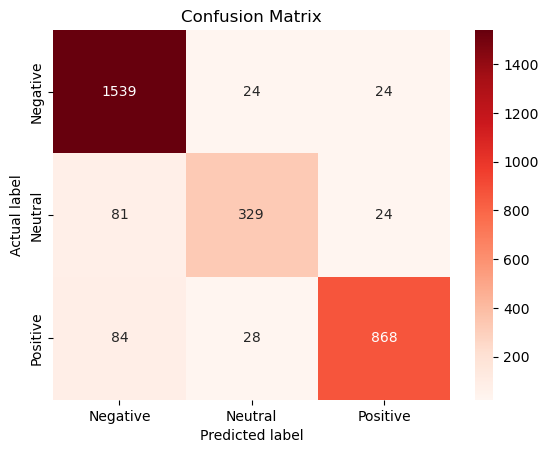

In [32]:
conf_mat = confusion_matrix(y_test, y_pred_ga, labels=[-1, 0, 1])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

- Untuk kelas "Negative," model berhasil memprediksi 1539 dari total sampel aktual sebagai negatif, dengan kesalahan 24 (diprediksi netral) dan 24 (diprediksi positif).
- Kelas "Neutral" memiliki 329 prediksi benar, dengan 81 salah diprediksi sebagai negatif dan 24 sebagai positif.
- elas "Positive" menunjukkan performa terbaik dengan 868 prediksi benar, dan kesalahan 84 (diprediksi negatif) serta 28 (diprediksi netral).
- Secara keseluruhan, model menunjukkan ketepatan tinggi pada kelas "Positive" dan "Negative," tetapi cenderung kurang akurat untuk "Neutral," yang memiliki lebih banyak kesalahan prediksi, terutama ke arah "Negative." Ini menunjukkan bahwa model mungkin kesulitan membedakan sentimen netral dari negatif dalam data ulasan Gojek.

In [60]:
from sklearn import metrics

accuracy_ga= metrics.accuracy_score(y_test, y_pred_ga)
recall_ga= metrics.recall_score(y_test, y_pred_ga, average='weighted')
precision_ga= metrics.precision_score(y_test, y_pred_ga, average='weighted')
f1_ga= metrics.f1_score(y_test, y_pred_ga, average='weighted')

accuracy_percent_ga = '{:.2%}'.format(accuracy_ga)
recall_percent_ga = '{:.2%}'.format(recall_ga)
precision_percent_ga = '{:.2%}'.format(precision_ga)
f1_percent_ga = '{:.2%}'.format(f1_ga)

print('Accuracy:', accuracy_percent_ga)
print('Recall:', recall_percent_ga)
print('Precision:', precision_percent_ga)
print('F1_Score:', f1_percent_ga)

Accuracy: 91.17%
Recall: 91.17%
Precision: 91.19%
F1_Score: 91.04%


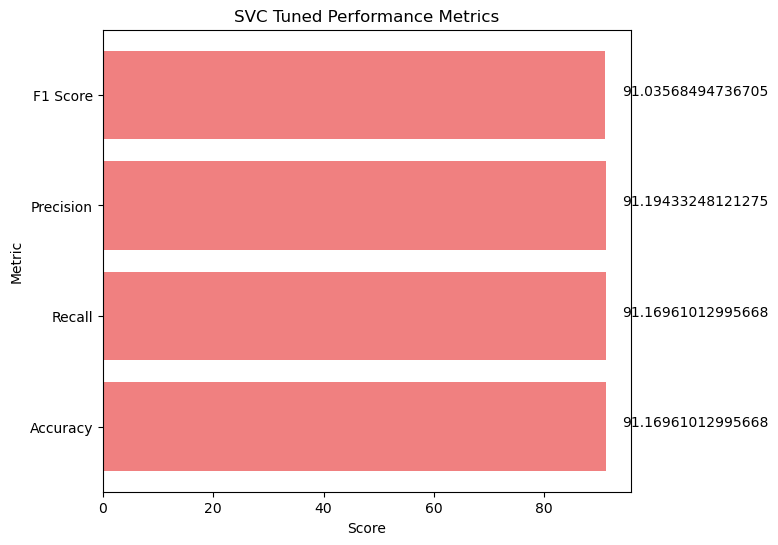

In [57]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
scores = [accuracy_ga*100, recall_ga*100, precision_ga*100, f1_ga*100]


plt.figure(figsize=(15, 6))
y_pos = np.arange(len(metrics))
plt.subplot(1,2,1)
plt.barh(y_pos, scores, align='center', color='lightcoral')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('SVC Tuned Performance Metrics')
plt.yticks(y_pos, metrics)
for i, v in enumerate(scores):
    plt.text(v + 3, i, str(v), va='baseline')
    
plt.show()
plt.show()

- Accuracy: Skor 91.1691012995668% menunjukkan bahwa model benar memprediksi sekitar 91,17% dari total data ulasan, mencerminkan kemampuan klasifikasi yang sangat baik secara keseluruhan.
- Recall: Dengan skor 91.1691012995668%, model berhasil mengidentifikasi 91,17% dari semua instance positif, negatif, dan netral dengan akurat, menunjukkan sensitivitas yang tinggi.
- Precision: Skor 91.1943248121275% menunjukkan bahwa 91,19% dari prediksi positif model benar-benar positif, mengindikasikan tingkat keakuratan prediksi yang tinggi dengan sedikit false positives.
- F1 Score: Skor 91.0356849736705% adalah rata-rata harmonik antara precision dan recall, menunjukkan keseimbangan yang baik antara kedua metrik tersebut, dengan nilai sekitar 91,04%.

Hasil evaluasi ini menunjukkan bahwa model SVC yang telah dioptimalkan dengan parameter terbaik (C=7, kernel=rbf, gamma=scale) memiliki performa yang sangat konsisten dan unggul, dengan peningkatan skor dibandingkan model sebelumnya (sekitar 90% menjadi 91%). Konsistensi skor di antara metrik menunjukkan bahwa model tidak hanya akurat secara keseluruhan (accuracy), tetapi juga efektif dalam mengenali kelas yang relevan (recall) dan meminimalkan kesalahan prediksi (precision). F1 Score yang tinggi mengkonfirmasi keseimbangan yang baik antara precision dan recall, yang penting untuk dataset dengan potensi ketidakseimbangan kelas, seperti yang terlihat dari matriks kebingungan sebelumnya. Peningkatan performa ini kemungkinan besar merupakan hasil dari optimasi parameter menggunakan Genetic Algorithm, yang memilih konfigurasi optimal untuk menangani data ulasan Gojek.

**Kesimpulan**:
Pada kasus ini, dilakukan pemodelan klasifikasi sentimen ulasan Gojek menggunakan Support Vector Classifier (SVC) dengan pendekatan optimasi hyperparameter berbasis Genetic Algorithm (GA). Proses dimulai dari tahap praproses data, ekstraksi fitur menggunakan TF-IDF dan CountVectorizer, hingga pemisahan data menjadi data latih dan data uji. Model SVC awal yang dibangun tanpa optimasi hyperparameter menghasilkan performa yang sudah cukup baik dengan skor akurasi, recall, precision, dan F1 di kisaran 90%. Namun, setelah dilakukan optimasi hyperparameter (C, kernel, gamma) menggunakan GA, performa model meningkat secara signifikan, dengan akurasi mencapai 91,17%, recall 91,17%, precision 91,19%, dan F1 Score 91,04%.

Optimasi menggunakan GA terbukti mampu menemukan kombinasi parameter terbaik, yaitu C=7, kernel=rbf, dan gamma=scale, yang memberikan hasil validasi tertinggi. Proses optimasi ini memang memerlukan waktu eksekusi yang cukup lama (sekitar 370 menit), namun sebanding dengan peningkatan performa model yang diperoleh. Analisis matriks kebingungan menunjukkan bahwa model sangat baik dalam mengklasifikasikan sentimen positif dan negatif, meskipun masih terdapat tantangan dalam membedakan sentimen netral dari negatif.

Secara keseluruhan, penggunaan Genetic Algorithm untuk tuning hyperparameter pada SVC terbukti efektif dalam meningkatkan performa klasifikasi sentimen. Hasil ini menunjukkan bahwa pemilihan parameter yang optimal sangat krusial dalam membangun model machine learning yang andal, terutama pada data dengan karakteristik dan distribusi kelas yang tidak seimbang. Pendekatan ini dapat direplikasi untuk kasus serupa pada domain lain yang memerlukan klasifikasi sentimen atau teks.